# Amazon Sales Data Analysis Unified Mentor Project 1

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
sales_data = pd.read_csv("Amazon Sales data.csv")
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Checking for null values for data cleaning

In [3]:
sales_data.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [4]:
sales_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### Adding Year and month column to the dataset

In [6]:
sales_data["Year"] = pd.to_datetime(sales_data["Order Date"]).dt.year
sales_data["Month"] = pd.to_datetime(sales_data["Order Date"]).dt.month
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [7]:
yearly_figures = sales_data.groupby("Year")[["Total Revenue","Total Cost","Total Profit"]].sum().reset_index()
yearly_figures.head()

,Year,Total Revenue,Total Cost,Total Profit
0,2010,19186024.92,12556457.49,6629567.43
1,2011,11129166.07,8388157.84,2741008.23
2,2012,31898644.52,22685634.40,9213010.12
3,2013,20330448.66,13615028.62,6715420.04
4,2014,16630214.43,10750752.75,5879461.68


### Visualising the Trends year wise

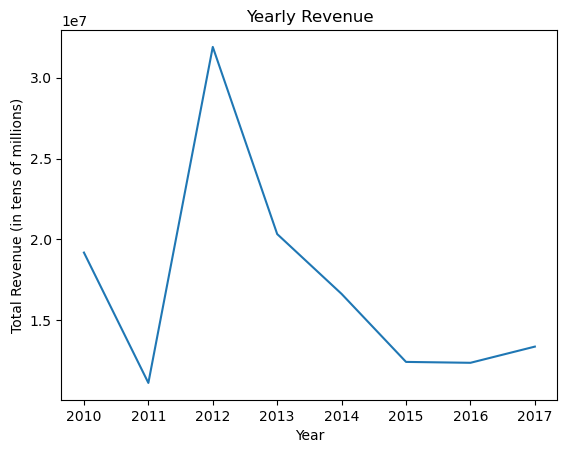

In [8]:
plt.plot(yearly_figures.Year,yearly_figures["Total Revenue"])
plt.xlabel("Year")
plt.ylabel("Total Revenue (in tens of millions)")
plt.title("Yearly Revenue")
plt.show()

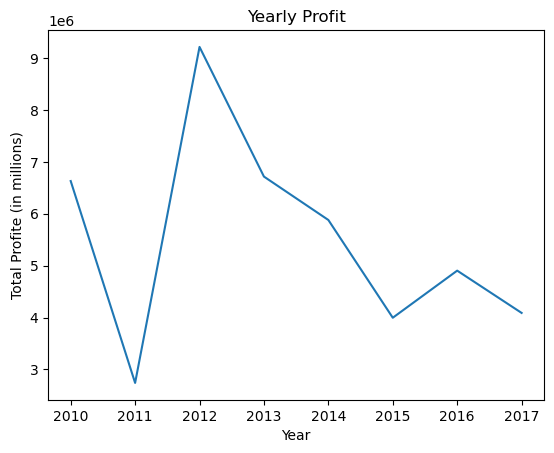

In [9]:
plt.plot(yearly_figures.Year,yearly_figures["Total Profit"])
plt.xlabel("Year")
plt.ylabel("Total Profite (in millions)")
plt.title("Yearly Profit")
plt.show()

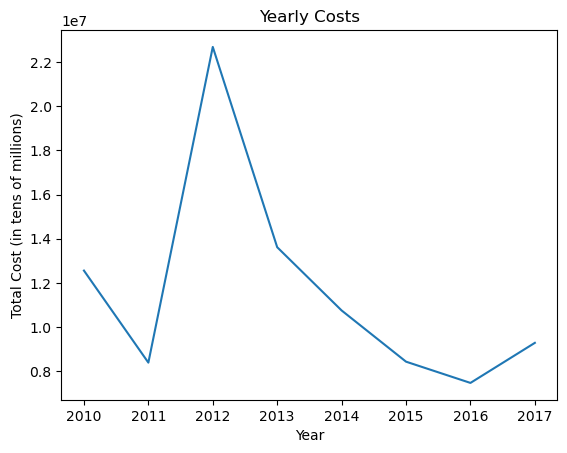

In [10]:
plt.plot(yearly_figures.Year,yearly_figures["Total Cost"])
plt.xlabel("Year")
plt.ylabel("Total Cost (in tens of millions)")
plt.title("Yearly Costs")
plt.show()

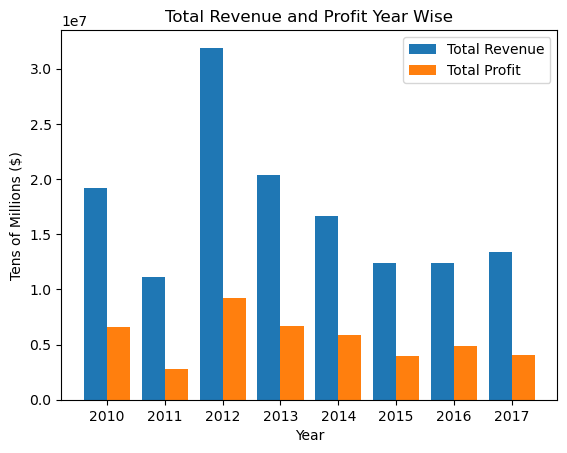

In [11]:
width=0.40
plt.bar(yearly_figures.Year-0.2,yearly_figures["Total Revenue"],width,label="Total Revenue")
plt.bar(yearly_figures.Year+0.2,yearly_figures["Total Profit"],width,label="Total Profit")
plt.legend()
plt.title("Total Revenue and Profit Year Wise")
plt.ylabel("Tens of Millions ($)")
plt.xlabel("Year")
plt.show()

### Dividing the data Yearly-month wise and analyzing the trends

In [12]:
yearlymonth_figures = sales_data.groupby(["Year","Month"])[["Total Revenue","Total Cost","Total Profit"]].sum().reset_index()
yearlymonth_figures["Yearmonth"] = yearlymonth_figures["Year"].astype(str) + '_' + yearlymonth_figures["Month"].astype(str)
yearlymonth_figures = yearlymonth_figures[["Yearmonth","Total Revenue","Total Cost","Total Profit"]]
yearlymonth_figures.head()

,Yearmonth,Total Revenue,Total Cost,Total Profit
0,2010_2,3410661.12,1986250.18,1424410.94
1,2010_5,2587973.26,1622531.74,965441.52
2,2010_6,1082418.40,354995.20,727423.20
3,2010_10,6064933.75,4569540.96,1495392.79
4,2010_11,3458252.00,2082940.30,1375311.70


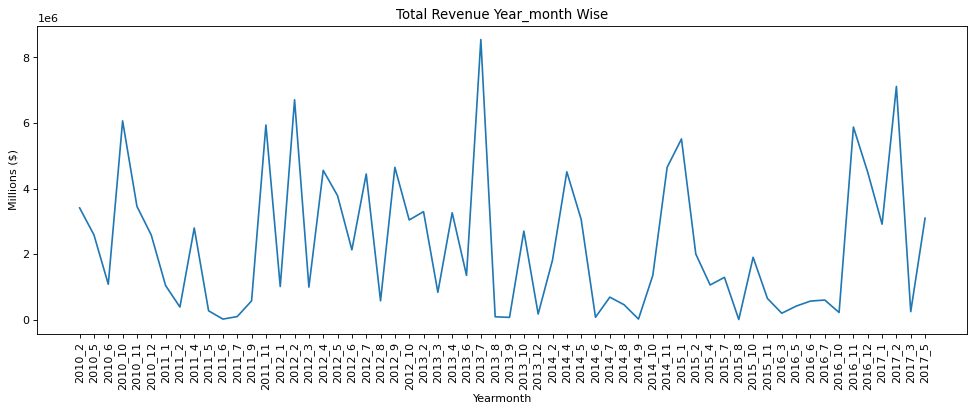

In [13]:
plt.figure(figsize=(15, 5), dpi=80)
plt.ylabel("Millions ($)")
plt.title("Total Revenue Year_month Wise")
plt.xlabel("Yearmonth")
plt.plot(yearlymonth_figures["Yearmonth"],yearlymonth_figures["Total Revenue"])
plt.xticks(rotation=90)
plt.show()

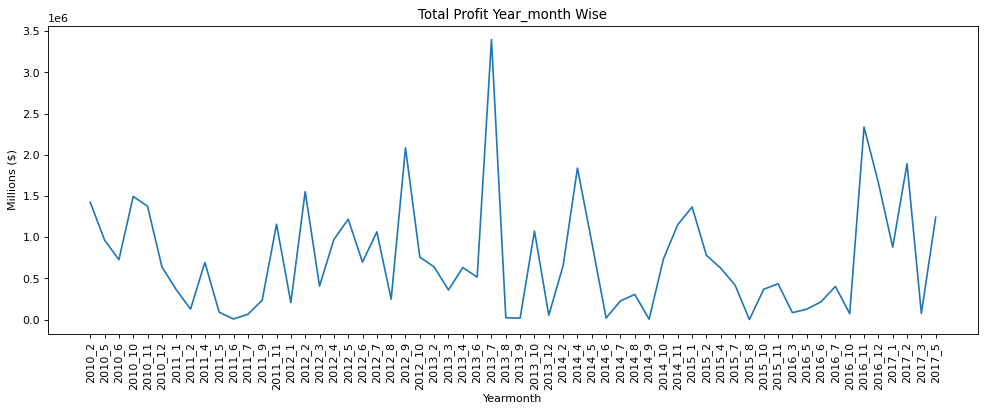

In [14]:
plt.figure(figsize=(15, 5), dpi=80)
plt.ylabel("Millions ($)")
plt.title("Total Profit Year_month Wise")
plt.xlabel("Yearmonth")
plt.plot(yearlymonth_figures["Yearmonth"],yearlymonth_figures["Total Profit"])
plt.xticks(rotation=90)
plt.show()

### Country wise trend analysis

In [15]:
country_figures = sales_data.groupby("Country")[["Total Revenue","Total Cost","Total Profit"]].sum().reset_index()
country_figures.head()

,Country,Total Revenue,Total Cost,Total Profit
0,Albania,247956.32,81320.96,166635.36
1,Angola,2798046.49,2104134.98,693911.51
2,Australia,2489933.49,1913328.37,576605.12
3,Austria,1244708.40,749700.51,495007.89
4,Azerbaijan,4478800.21,2965873.38,1512926.83


In [16]:
country_figures[country_figures["Total Revenue"]==country_figures["Total Revenue"].max()]

,Country,Total Revenue,Total Cost,Total Profit
24,Honduras,6336545.48,4726597.96,1609947.52


In [17]:
country_figures[country_figures["Total Profit"]==country_figures["Total Profit"].max()]

,Country,Total Revenue,Total Cost,Total Profit
16,Djibouti,6052890.86,3627572.99,2425317.87


In [18]:
country_figures[country_figures["Total Cost"]==country_figures["Total Cost"].max()]

,Country,Total Revenue,Total Cost,Total Profit
24,Honduras,6336545.48,4726597.96,1609947.52


### Item type wise trend analysis

In [19]:
item_type_figures = sales_data.groupby("Item Type")[["Total Revenue","Total Cost","Total Profit"]].sum().reset_index()
item_type_figures.head()

,Item Type,Total Revenue,Total Cost,Total Profit
0,Baby Food,10350327.6,6463683.90,3886643.70
1,Beverages,2690794.6,1802747.32,888047.28
2,Cereal,5322898.9,3030455.47,2292443.43
3,Clothes,7787292.8,2553958.40,5233334.40
4,Cosmetics,36601509.6,22045460.94,14556048.66


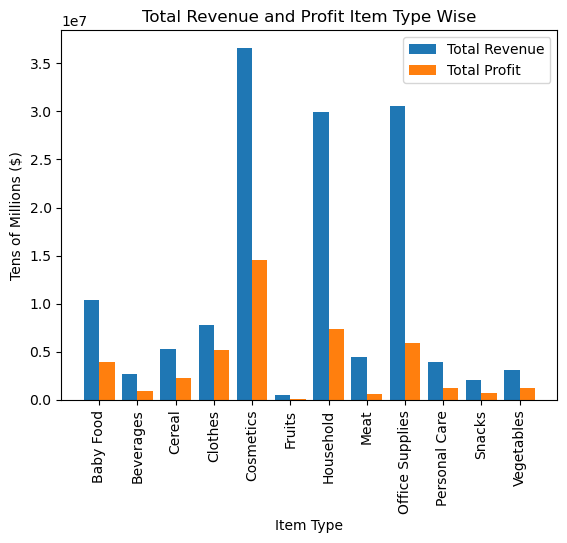

In [20]:
x=np.arange(12)
plt.bar(x-0.2,item_type_figures["Total Revenue"],width,label="Total Revenue")
plt.bar(x+0.2,item_type_figures["Total Profit"],width,label="Total Profit")
plt.legend()
plt.ylabel("Tens of Millions ($)")
plt.title("Total Revenue and Profit Item Type Wise")
plt.xlabel("Item Type")
plt.xticks(ticks=x,labels=item_type_figures["Item Type"],rotation=90)
plt.show()

### Sales Channel Wise trend analysis 

In [21]:
sales_channel_figures = sales_data.groupby("Sales Channel")[["Total Revenue","Total Cost","Total Profit"]].sum().reset_index()
sales_channel_figures.head()

,Sales Channel,Total Revenue,Total Cost,Total Profit
0,Offline,79094809.20,54174082.53,24920726.67
1,Online,58253959.11,39006487.38,19247471.73


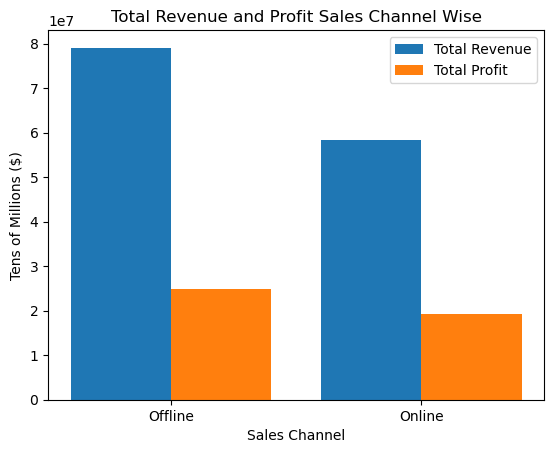

In [23]:
x=np.arange(2)
width=0.4
plt.bar(x-0.2,sales_channel_figures["Total Revenue"],width,label="Total Revenue")
plt.bar(x+0.2,sales_channel_figures["Total Profit"],width,label="Total Profit")
plt.legend()
plt.title("Total Revenue and Profit Sales Channel Wise")
plt.ylabel("Tens of Millions ($)")
plt.xlabel("Sales Channel")
plt.xticks(ticks=x,labels=sales_channel_figures["Sales Channel"])
plt.show()